In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import config

In [2]:
df = pd.read_csv(f'{config.DATA_PATH}/videos_processed.csv')
df['aspect_ratio'] = df['width'] / df['height']
df.head()

,Unnamed: 0,file_id,name,path,frame_count,category,accuracy,mif_index,duration,duration_frames,fps,width,height,best_category,best_category_accuracy,aspect_ratio
0,0,0,vine-Slicing-the-gouda-delicious-cheese-h0FYlY...,../videos_processed/slicing/vine-Slicing-the-g...,89,slicing,0.070857,44,3.00,75,25.0,480,480,sanding,0.274699,1.000000
1,1,1,yt-_yXoA1joYRY_39,../videos_processed/slicing/yt-_yXoA1joYRY_39.mp4,89,slicing,0.345144,37,3.04,76,25.0,480,360,slicing,0.345144,1.333333
2,2,2,vine-slicing-and-dicing-makeitwork-MwlKYUmtqvQ_1,../videos_processed/slicing/vine-slicing-and-d...,89,slicing,0.001159,72,3.00,75,25.0,480,480,studying,0.202018,1.000000
3,3,3,yt-_Unr3Eu8Rpc_103,../videos_processed/slicing/yt-_Unr3Eu8Rpc_103...,89,slicing,0.006845,33,3.04,76,25.0,1280,720,cooking,0.290147,1.777778
4,4,4,yt--pncWvsLfh0_56,../videos_processed/slicing/yt--pncWvsLfh0_56.mp4,71,slicing,0.018701,71,3.04,76,25.0,1280,720,cooking,0.154586,1.777778


<AxesSubplot:xlabel='duration', ylabel='count'>

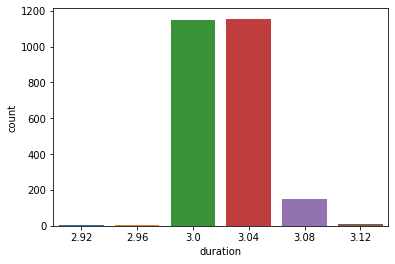

In [3]:
sns.countplot(data=df, x='duration')

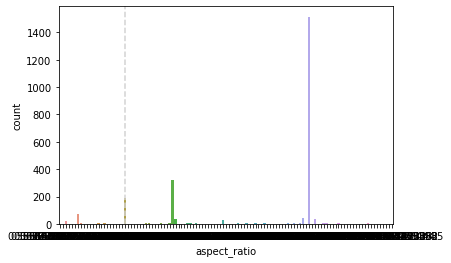

In [4]:
sns.countplot(data=df.sort_values('aspect_ratio'), x='aspect_ratio')

#print(df.sort_values('aspect_ratio')['aspect_ratio'].unique())

counter = 0
for aspect_ratio in df.sort_values('aspect_ratio')['aspect_ratio'].unique():
    if aspect_ratio >= 1:
        # landscape format
        break
    counter += 1

# left of the line: portrait
# right of the line: landscape
plt.axvline(counter, linestyle='--', color='lightgray')

<AxesSubplot:ylabel='best_category_accuracy'>

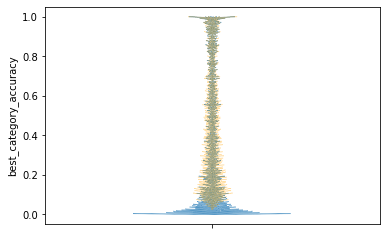

In [5]:
sns.swarmplot(data=df, y='accuracy', size=1)
sns.swarmplot(data=df, y='best_category_accuracy', size=1, color='orange', alpha=0.5)

<AxesSubplot:ylabel='best_category_accuracy'>

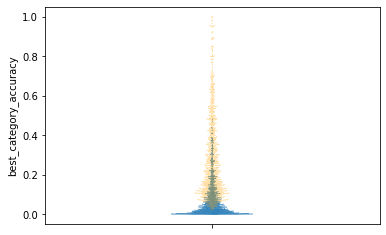

In [6]:
sns.swarmplot(data=df[df['category'] != df['best_category']], y='accuracy', size=1)
sns.swarmplot(data=df[df['category'] != df['best_category']], y='best_category_accuracy', size=1, color='orange', alpha=0.5)

<AxesSubplot:xlabel='best_category_accuracy', ylabel='accuracy'>

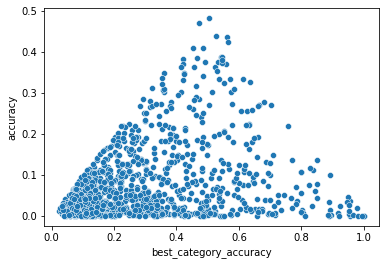

In [7]:
sns.scatterplot(data=df[df['category'] != df['best_category']], x='best_category_accuracy', y='accuracy')

<AxesSubplot:xlabel='mif_index', ylabel='count'>

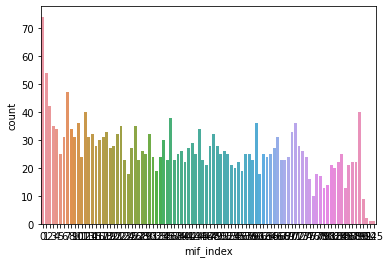

In [8]:
sns.countplot(data=df, x='mif_index')

In [15]:
df_conflict = df[df['category'] != df['best_category']]

for category in df_conflict['category'].unique():
    print(category, df_conflict[df_conflict['category'] == category]['best_category'].unique())

slicing ['sanding' 'studying' 'cooking' 'smashing' 'carving' 'peeling']
interviewing ['lecturing' 'asking']
whistling ['adult+female+speaking']
watering ['spraying' 'leaking' 'gardening' 'planting' 'weeding']
grilling ['barbecuing' 'frying' 'spraying' 'mowing']
pulling ['bowing' 'massaging' 'climbing']
drawing ['handwriting']
folding ['pushing' 'wrapping' 'waxing']
cooking ['stirring' 'baking']
turning ['drumming' 'assembling' 'juggling' 'pitching' 'hugging' 'dancing'
 'riding']
licking ['shaving' 'drinking' 'writing']
teaching ['interviewing' 'lecturing' 'juggling' 'laughing']
hugging ['dancing' 'crying']
playing+fun ['dancing' 'clapping' 'child+speaking' 'swinging' 'wrestling']
gardening ['picking' 'planting' 'sowing']
barbecuing ['grilling']
skating ['dancing']
kneeling ['dancing']
dripping ['painting' 'brushing']
weeding ['sowing' 'mowing' 'digging' 'gardening']
spilling ['peeling' 'tickling' 'painting' 'drinking' 'manicuring' 'flipping']
shaking ['clapping' 'adult+male+speaking' '